<a href="https://colab.research.google.com/github/vhcarlim/Python-Scripting/blob/main/Tarefa_Ci%C3%AAnciaDeDados_VictorPassos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Alteramos o nome do arquivo aqui para 'dados_aluguel-2.csv' para combinar com o seu upload
try:
    dados = pd.read_csv('dados_aluguel-2.csv', sep=';')
except:
    dados = pd.read_csv('dados_aluguel-2.csv', sep=',')

print("Dados carregados com sucesso!")
display(dados.head())

Dados carregados com sucesso!


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [3]:
# 1. Calcular a média de quartos por apartamentos.

# Primeiro, filtrei para pegar apenas os dados onde o tipo é 'Apartamento'

apenas_apartamentos = dados[dados['Tipo'] == 'Apartamento']

# Calculei a média da coluna 'Quartos' desse grupo filtrado
media_quartos = apenas_apartamentos['Quartos'].mean()

print(f"A média de quartos por apartamento é: {media_quartos:.2f}")

A média de quartos por apartamento é: 2.48


In [4]:
# 2. Conferir quantos bairros únicos existem no dataset.

# O comando nunique() conta quantos nomes diferentes aparecem na coluna Bairro.

qtd_bairros = dados['Bairro'].nunique()

print(f"Existem {qtd_bairros} bairros únicos no dataset.")

Existem 162 bairros únicos no dataset.


In [5]:
# 3. Analisar quais bairros possuem a média de valor de aluguel mais elevado.

# Agrupei por Bairro e peguei a média do Valor.

# O sort_values(ascending=False) ordena do maior para o menor.

bairros_mais_caros = dados.groupby('Bairro')['Valor'].mean().sort_values(ascending=False)

# Mostramos os 10 primeiros

print(bairros_mais_caros.head(10))

Bairro
Jacarepaguá       314143.489637
Irajá             154610.470588
Caju              120264.782609
Vasco da Gama     120000.000000
Cidade Nova        88166.692308
Cidade de Deus     80000.000000
Gamboa             60940.791667
Pavuna             47442.315789
Santo Cristo       45139.188406
Saúde              36083.615385
Name: Valor, dtype: float64


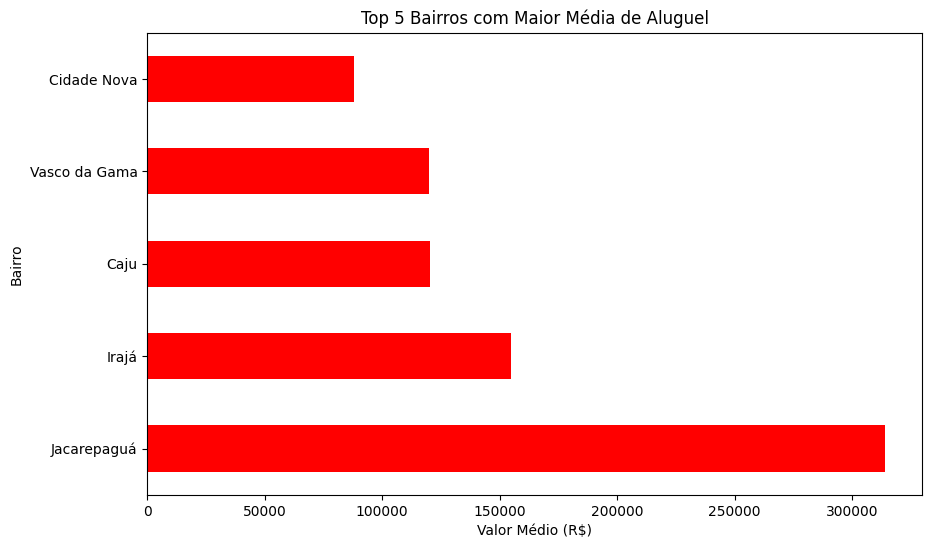

In [11]:
# 4. Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevados.

# Utilizei os top 5 que calculamos no código anterior.

top_5_bairros = bairros_mais_caros.head(5)

# Código do gráfico
# kind='barh' faz a barra ser horizontal

top_5_bairros.plot(kind='barh', figsize=(10, 6), color='red')

plt.title('Top 5 Bairros com Maior Média de Aluguel')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Bairro')
plt.show()

In [12]:
# 5. Identificar quais apartamentos possuem área maior que 80 m2 ou aluguel menor que R$ 4.000,00.

# O símbolo | representa o "OU"

filtro = (apenas_apartamentos['Area'] > 80) | (apenas_apartamentos['Valor'] < 4000)

# Filtro
resultado_final = apenas_apartamentos[filtro]

print(f"Total de apartamentos encontrados: {len(resultado_final)}")
display(resultado_final.head())

Total de apartamentos encontrados: 19184


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
